# Loading Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn


In [2]:
# import dataset

df = pd.read_csv('Dataset/amazonLabelled - amazonLabelled.csv')

In [3]:
df.head()

,S,Feedback,Sentiment
0,1,"Good case, Excellent value.",Positive
1,2,Great for the jawbone.,Positive
2,3,Tied to charger for conversations lasting more...,Negative
3,4,The mic is great.,Positive
4,5,I have to jiggle the plug to get it to line up...,Negative


In [4]:
df.shape

(999, 3)

In [5]:
df.isnull().values.any()

False

In [6]:
df["Sentiment"].value_counts()

Positive    500
Negative    499
Name: Sentiment, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb=LabelEncoder()

In [9]:
lb.fit(df["Sentiment"])

LabelEncoder()

In [10]:
df["Sentiment"]=lb.transform(df["Sentiment"])

In [11]:
df.head()

,S,Feedback,Sentiment
0,1,"Good case, Excellent value.",1
1,2,Great for the jawbone.,1
2,3,Tied to charger for conversations lasting more...,0
3,4,The mic is great.,1
4,5,I have to jiggle the plug to get it to line up...,0


# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Sentiment",axis=1),df["Sentiment"],test_size=0.2)

In [14]:
X_train.shape

(799, 2)

In [15]:
train_df=pd.concat([X_train,y_train],axis=1).to_csv("Dataset/train_set.csv",index=False)

In [16]:
test_df=pd.concat([X_test,y_test],axis=1).to_csv("Dataset/test_set.csv",index=False)

# Data ingestion step - Training dataset

In [17]:
train_df=pd.read_csv("Dataset/train_set.csv")

In [18]:
X_train,y_train=train_df["Feedback"],train_df["Sentiment"]

In [19]:
X_train

0                                  What a waste of time!
1                                I'm a bit disappointed.
2                                      Made very sturdy.
3      This particular model would not work with my M...
4      It's been my choice headset for years.Great so...
                             ...                        
794    I have had this phone for over a year now, and...
795                                       Disappointed!.
796    I tried talking real loud but shouting on the ...
797      Cant get the software to work with my computer.
798    I used bitpim (a free program you can find on ...
Name: Feedback, Length: 799, dtype: object

In [20]:
y_train

0      0
1      0
2      1
3      0
4      1
      ..
794    0
795    0
796    0
797    0
798    1
Name: Sentiment, Length: 799, dtype: int64

In [21]:
y_train.value_counts()

1    400
0    399
Name: Sentiment, dtype: int64

(array([399.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 400.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

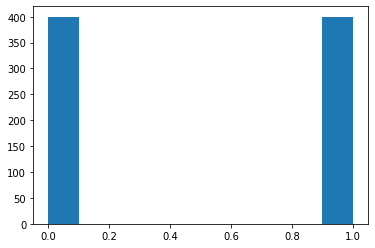

In [22]:
plt.hist(y_train)

# Preprocessing Data

In [25]:
!pip install nltk

In [23]:
import nltk

In [27]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
lemmatizer=WordNetLemmatizer()

In [25]:
def preprocess_data(data):
    corpus=[]
    for i in data:
        mess=re.sub("[^a-zA-Z0-9]"," ",i)
        mess=mess.lower().split()
        mess=[lemmatizer.lemmatize(word) for word in mess if word not in stopwords.words("english")]
        mess=" ".join(mess)
        corpus.append(mess)
    return corpus    

In [26]:
corpus=preprocess_data(X_train)

In [27]:
len(corpus)

799

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv=CountVectorizer(ngram_range=(1,2))

In [30]:
cv.fit(corpus)

CountVectorizer(ngram_range=(1, 2))

In [31]:
count_train=cv.transform(corpus)

In [32]:
count_train.shape

(799, 4435)

# Model Training

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier(n_estimators=1200)

In [72]:
rf.fit(count_train,y_train)

RandomForestClassifier(n_estimators=1200)

In [73]:
rf.score(count_train,y_train)

0.9974968710888611

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
scores=cross_val_score(rf,count_train,y_train,cv=3)

In [76]:
scores.mean()

0.7609801657702309

In [77]:
scores.std()

0.03344186173272416

# Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid={'n_estimators': [700,1000,1200], 'min_samples_split': [2,4,8,16]}

In [83]:
grid=GridSearchCV(rf,param_grid,n_jobs=-1)

In [84]:
grid.fit(count_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=1200), n_jobs=-1,
             param_grid={'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [700, 1000, 1200]})

In [87]:
n_est=grid.best_params_["n_estimators"]
min_sam_splt=grid.best_params_["min_samples_split"]


In [35]:
rf=RandomForestClassifier(n_estimators=500,min_samples_split=4)

In [36]:
rf.fit(count_train,y_train)

RandomForestClassifier(min_samples_split=4, n_estimators=500)

# Model Packaging Step

In [37]:
import joblib

In [38]:
joblib.dump(cv,"models/count_vectorizer.pkl")

['models/count_vectorizer.pkl']

In [39]:
joblib.dump(rf,"models/rf_sent_model.pkl")

['models/rf_sent_model.pkl']